In [505]:
%pip install keras_preprocessing
%pip install matplotlib
%pip install idx2numpy
%pip install pillow
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [506]:
from keras_preprocessing import image as img
import os
from matplotlib import pyplot as plt
import idx2numpy
import keras_preprocessing
import tensorflow as tf
import numpy as np

In [507]:
os.system("rm ./simulation/I.txt")

0

In [508]:
sizt = 28
path = "mnist/data/t10k-images-idx3-ubyte"

In [509]:
sizeM = open("./simulation/sizeM.txt","w")
sizeM.write(str(sizt))
sizeM.close()
f = open("./simulation/I.txt","w")

In [510]:
array = idx2numpy.convert_from_file(path)[0]
k = 0
l= 0

for i in array:
    for j in i:
        strtmp = f'{hex(int((j/255)*2**3))[2:]}'
        strtmp2 = '0'*(2-len(strtmp))+strtmp+' '
        f.write(strtmp2)
        # print(f'{strtmp2}',end='  ')
    f.write("\n")
    # print("\n")
f.close()

In [511]:
def concat(n):
    # print(int('0x'+n,16))
    integ = bin(int('0x'+n,16))
    integ = ('0'*(16-len(integ[2:]))+integ[2:])
    # print(integ[15])
    # print(integ,"c")
    # print(integ[0])
    a = int(int("0b"+integ,2)/16)
    if(str(integ[0])=='1'):

        # print ("AJKHAH")
        # print(integ,n,"a")
        temp1 = integ.replace("0","k")
        # print(temp1)
        temp2 = temp1.replace('1','0')
        # print(temp2)
        integ = temp2.replace('k','1')
        # print(integ)
        a = -int((int("0b"+integ,2)+1)/16)
    # print(integ,'h')

    return [a]

In [512]:
modelo_dig = tf.keras.models.load_model("./model_network/digits_recognition_cnn.h5")

In [547]:
kernels = modelo_dig.weights[0]
kernel0 = kernels[:,:,:,0]
kernels

<tf.Variable 'conv2d/kernel:0' shape=(5, 5, 1, 8) dtype=float32, numpy=
array([[[[-0.20271891,  0.4280199 , -0.01574893,  0.11573859,
          -0.53908044, -0.31554586, -0.18040085, -0.3849555 ]],

        [[ 0.23361   ,  0.11672499,  0.04608683, -0.03984576,
          -0.50565386,  0.11871683, -0.3267204 , -0.63071305]],

        [[ 0.06837018, -0.07272813, -0.1481508 ,  0.31113368,
          -0.16036785, -0.01259172, -0.246288  ,  0.04089832]],

        [[ 0.22307533, -0.33017382, -0.39290714, -0.06284754,
           0.40477252,  0.49210456,  0.3224305 , -0.17939396]],

        [[-0.0425005 , -0.15981999,  0.07168826,  0.07913549,
           0.5135836 ,  0.17230046,  0.17002568,  0.14156283]]],


       [[[ 0.01020676, -0.04461861, -0.00516608,  0.17475085,
          -0.33004624, -0.26157534, -0.11756092,  0.23284341]],

        [[ 0.36547714,  0.14792763, -0.24324055,  0.1665582 ,
          -0.32842246,  0.25442225,  0.03145333,  0.15766165]],

        [[ 0.09862181,  0.20779471, -

In [514]:
def tohex(val, nbits):
    return hex((val + (1 << nbits)) % (1 << nbits))
print(tohex(-2, 16).lstrip('0x').lower())
# print(hex(-1518255953).replace('0x','').upper())
# print(tohex(-1518255953, 32).lstrip('0x').upper())

fffe


In [559]:
def kernel_txt(i,kernel,string='Kernel'):
    ker = open(f"simulation/{string}{i}.txt",'w')
    kernel0_0 = np.array(kernel[:,:,0])
    base = 8
    for i in kernel0_0:
        for j in i:
            print((int(j*2**base)),end=' ')
            strtmp2 = tohex(int(j*2**base),16)+' '
            ker.write(strtmp2[2:])
            # print(f'{strtmp2}',end='  ')
        ker.write("\n")
        print('\n')
    ker.close()

In [561]:
lim = np.array(kernels.shape)[::-1][0]
for i in range(lim):
    kernel_txt(i,kernels[:,:,:,i])

-51 59 17 57 -10 

2 93 25 -24 -72 

20 33 -57 128 102 

5 -17 -52 45 56 

-26 -11 -16 -81 -56 

109 29 -18 -84 -40 

-11 37 53 105 -51 

7 76 125 77 -3 

-65 -51 70 20 -57 

-103 -65 24 118 -30 

-4 11 -37 -100 18 

-1 -62 -138 -117 -85 

49 67 -40 -126 -159 

48 113 136 100 -29 

45 -12 79 182 104 

29 -10 79 -16 20 

44 42 48 51 -141 

30 29 60 -111 -139 

84 129 30 -91 -7 

50 87 32 -131 -117 

-138 -129 -41 103 131 

-84 -84 20 -15 129 

-62 -94 -74 -2 60 

18 52 0 97 -9 

-1 19 28 77 25 

-80 30 -3 125 44 

-66 65 55 56 80 

-1 -10 4 40 39 

-130 53 -36 -138 -139 

-21 -5 -52 -106 -44 

-46 -83 -63 82 43 

-30 8 42 42 -21 

0 147 35 137 35 

140 93 -74 10 42 

-114 -145 -161 -130 -46 

-98 -161 10 -45 36 

59 40 123 52 131 

-6 91 98 25 9 

48 -3 22 0 -80 

16 -101 -82 -126 -126 



kernel0

In [563]:
kernels2d_1 = modelo_dig.weights[2]
# kernels2d_1[:,:,:,0]
# kernel_txt(0,kernels2d_1[:,:,:,0])

lim = np.array(kernels2d_1.shape)[::-1][0]
for i in range(lim):
    kernel_txt(i,kernels2d_1[:,:,:,i],string="kernels2d_1_")

46 -4 60 2 19 

44 0 78 43 -3 

-43 -59 -47 -52 -20 

3 -26 -73 0 23 

4 3 -28 -20 28 

2 -16 3 -3 -45 

-30 -36 -39 -22 23 

-38 -7 -14 -15 12 

22 -11 6 47 30 

-17 58 13 -11 1 

-22 33 24 -19 -48 

-17 8 40 14 2 

-25 49 42 -18 -26 

-28 36 55 -13 -14 

-40 6 -11 -21 -20 

6 0 42 -1 6 

-12 8 27 26 -13 

-35 21 27 -35 -12 

-10 40 27 -25 -53 

-18 31 17 6 -4 

27 34 -6 43 12 

-24 -26 22 22 4 

-27 -35 1 12 -26 

-47 -33 -25 28 -22 

9 12 -38 -12 -52 

13 0 27 -23 -30 

0 7 -21 27 -16 

-15 0 0 35 4 

-25 21 15 -9 -53 

14 -8 -27 30 7 

4 3 -6 9 7 

-11 -8 12 53 19 

48 50 23 -1 0 

49 15 -12 -29 9 

2 9 -9 -54 -35 

-41 3 -28 4 -34 

43 23 21 40 17 

37 18 36 30 37 

2 -4 -36 -23 -3 

-27 -14 -45 -53 -19 

29 -24 27 40 -25 

3 30 0 -1 -26 

-2 17 26 12 -6 

-80 -24 26 -25 -53 

-41 -37 -31 -66 -32 

-13 0 -12 -31 -21 

-22 43 37 18 -45 

4 -8 35 -10 -11 

-6 23 0 11 -17 

18 39 15 -17 -12 

19 -14 -29 -13 -22 

10 -1 -25 -7 3 

13 22 14 2 26 

46 13 38 67 0 

-59 -75 -35 38 -30 

-

In [518]:
out = open("./simulation/IxKernel.txt","r")

klin1 = []
m1=[]
k= out.readlines()
for i in k:
    m1.append(list(map(concat,i.split())))


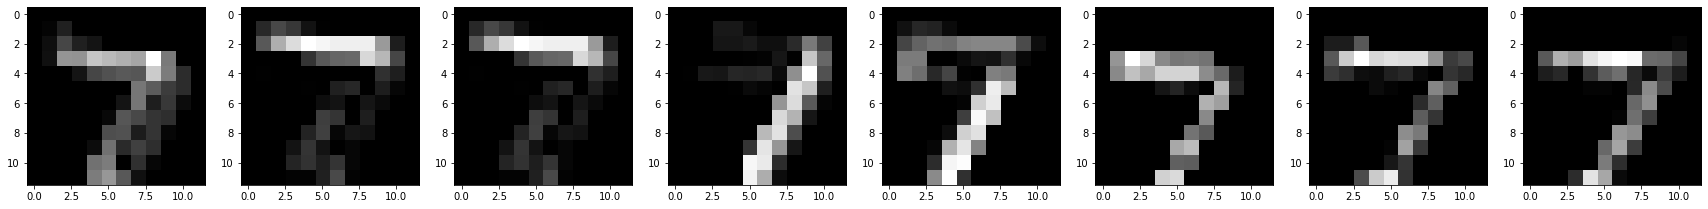

In [541]:
array_out =[]

for i in range(8):
    array_out.append(open(f"./simulation/maxIxKernelPooling{i}.txt","r"))
klin2 = []
plt.figure(figsize=(30,8))
for ii in range(8):
    k2 = array_out[ii].readlines()
    m2=[]
    for i in k2:
        m2.append(list(map(concat,i.split())))
    plt.subplot(1,8,ii+1)
    plt.imshow(m2,cmap="gray")
# plt.imshow(m2)

for i in range(8):
    array_out[i].close()


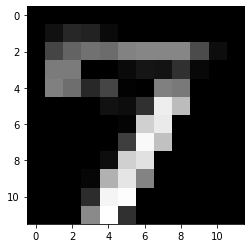

In [529]:
out2 = open("./simulation/maxIxKernelPooling4.txt","r")
klin2 = []
m2=[]
k2 = out2.readlines()
for i in k2:
    m2.append(list(map(concat,i.split())))
plt.imshow(m2,cmap="gray")


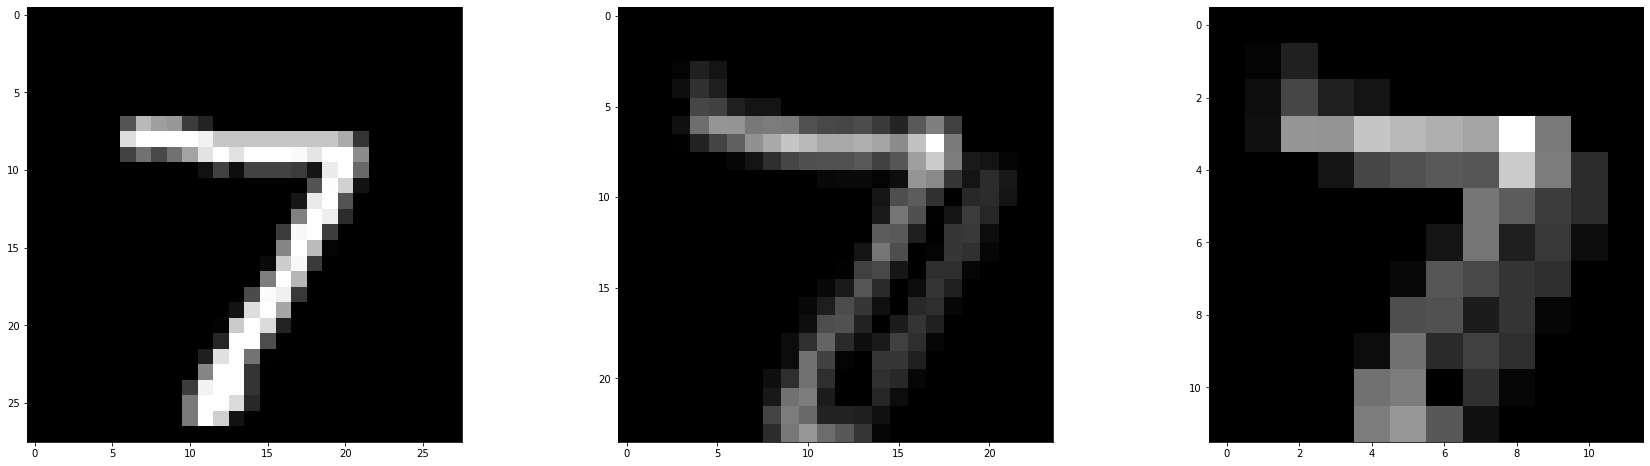

In [523]:
plt.figure(figsize=(30,8))
plt.subplot(1,3,1)
plt.imshow(array,cmap="gray")
plt.subplot(1,3,2)
plt.imshow(m1,cmap="gray")
plt.subplot(1,3,3)
plt.imshow(m2,cmap="gray")
plt.show()


In [ ]:
m2

[[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]],
 [[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]],
 [[0], [34], [29], [6], [0], [0], [0], [0], [0], [0], [0], [0]],
 [[0], [41], [43], [75], [67], [57], [57], [47], [48], [18], [6], [0]],
 [[0], [2], [24], [14], [21], [33], [30], [28], [61], [31], [12], [0]],
 [[0], [0], [0], [0], [3], [6], [4], [27], [32], [45], [0], [0]],
 [[0], [0], [0], [0], [0], [0], [13], [17], [48], [31], [0], [0]],
 [[0], [0], [0], [0], [0], [0], [17], [30], [42], [0], [0], [0]],
 [[0], [0], [0], [0], [0], [13], [13], [44], [24], [0], [0], [0]],
 [[0], [0], [0], [0], [2], [26], [49], [46], [0], [0], [0], [0]],
 [[0], [0], [0], [6], [13], [16], [42], [7], [0], [0], [0], [0]],
 [[0], [0], [0], [33], [45], [52], [33], [0], [0], [0], [0], [0]]]

In [ ]:
os.system("rm ./images/preprocessamento.jpg")
os.system("rm ./images/posprocessamento.jpg")

img.save_img("./images/preprocessamento.jpg",array)
img.save_img("./images/posprocessamento.jpg",m1)
img.save_img("./images/maxpoolingposprocessamento.jpg",m2)


ValueError: Expected image array to have rank 3 (single image). Got array with shape: (28, 28)

hex(1)

In [ ]:
hex(1)

'0x1'